# Customer Segmentation using K-Means 

## Importing Libraries

##### Note: Ipympl is used for matplotlib. It can be installed from [here](https://github.com/matplotlib/ipympl). By using ipympl, we can do a lot of things to the plot figure such as, zooming in, zooming out, and saving.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import seaborn as sns
from scipy.stats import norm
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import datetime
import math
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

## Loading The Dataset


In [2]:
df = pd.read_excel('C:/Users/ASUS/Downloads/OnlineRetail.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


## Get to Know Our Data

In [3]:
print(df.shape)
df.info()
df.describe(include='all')

(541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


## Handling Missing Value

In [4]:
mv_info = pd.DataFrame(df.isna().sum(), columns={'Number of MV'}) #MV = Missing Value
mv_info['% MV'] = (df.isna().sum() / df.shape[0]) * 100
mv_info

,Number of MV,% MV
InvoiceNo,0,0.000000
StockCode,0,0.000000
Description,1454,0.268311
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
CustomerID,135080,24.926694
Country,0,0.000000


In [5]:
df.dropna(axis = 0, inplace = True)

mv_info = pd.DataFrame(df.isna().sum(), columns={'Number of MV'})
mv_info

,Number of MV
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


## Handling Duplicates

In [6]:
df.duplicated().sum() #Number of duplicate on our dataset

5225

In [7]:
df.drop_duplicates(inplace=True) #Dropping those duplicates from our dataset
df.duplicated().sum()

0

In [8]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


## Exploratory Data Analysis

In [9]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,401604.0,401604,401604,401604.000000,401604,401604.000000,401604.000000,401604
unique,22190.0,3684,3896,NaN,20460,NaN,NaN,37
top,576339.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-11-14 15:27:00,NaN,NaN,United Kingdom
freq,542.0,2065,2058,NaN,543,NaN,NaN,356728
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,12.183273,NaN,3.474064,15281.160818,NaN
std,NaN,NaN,NaN,250.283037,NaN,69.764035,1714.006089,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,0.000000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,13939.000000,NaN


### Exploring Countries Column

In [10]:
print(Counter(df['Country']))

Counter({'United Kingdom': 356728, 'Germany': 9480, 'France': 8475, 'EIRE': 7475, 'Spain': 2528, 'Netherlands': 2371, 'Belgium': 2069, 'Switzerland': 1877, 'Portugal': 1471, 'Australia': 1258, 'Norway': 1086, 'Italy': 803, 'Channel Islands': 757, 'Finland': 695, 'Cyprus': 611, 'Sweden': 461, 'Austria': 401, 'Denmark': 389, 'Japan': 358, 'Poland': 341, 'USA': 291, 'Israel': 247, 'Unspecified': 241, 'Singapore': 229, 'Iceland': 182, 'Canada': 151, 'Greece': 146, 'Malta': 127, 'United Arab Emirates': 68, 'European Community': 61, 'RSA': 58, 'Lebanon': 45, 'Lithuania': 35, 'Brazil': 32, 'Czech Republic': 30, 'Bahrain': 17, 'Saudi Arabia': 10})


### Handling Canceled Orders

##### If we look at the description of dataset above, it can be seen that the minimum value of Quantity column is negative. What does it mean? Well, it simply means that the order got canceled. It must be dropped to make our data clean.

In [11]:
df['canceled_order'] = df['Quantity'].apply(lambda x:int (x < 0)) #Using lambda function to spot canceled order
df['canceled_order'].value_counts()

0    392732
1      8872
Name: canceled_order, dtype: int64

In [12]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,canceled_order
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,0
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,0
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,0
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,0
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,0


In [13]:
df = df[~(df['canceled_order']>0)] #Excluding canceled orders
df.shape

(392732, 9)

In [14]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,canceled_order
count,392732.0,392732,392732,392732.000000,392732,392732.000000,392732.000000,392732,392732.0
unique,18536.0,3665,3877,NaN,17286,NaN,NaN,37,NaN
top,576339.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-11-14 15:27:00,NaN,NaN,United Kingdom,NaN
freq,542.0,2023,2016,NaN,542,NaN,NaN,349227,NaN
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,13.153718,NaN,3.125596,15287.734822,NaN,0.0
std,NaN,NaN,NaN,181.588420,NaN,22.240725,1713.567773,NaN,0.0
min,NaN,NaN,NaN,1.000000,NaN,0.000000,12346.000000,NaN,0.0
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,13955.000000,NaN,0.0


### Handling Zero Value 

##### If we pay closer attention to Unit Price column, it can be found that its minimum value is zero. Is it normal? It might be free products. But, it will later disturb our data preprocessing if we keep it, so the best way is to get it removed  

In [15]:
v = df['UnitPrice'] <= 0 
v.value_counts()

False    392692
True         40
Name: UnitPrice, dtype: int64

In [16]:
df.loc[df['UnitPrice'].values <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,canceled_order
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany,0
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,0
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE,0
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom,0
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom,0
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom,0
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom,0
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom,0


In [17]:
df = df[~(df['UnitPrice']<=0)]
df.shape

(392692, 9)

### Handling Outlier
 

{'whiskers': [<matplotlib.lines.Line2D at 0x1abb536b8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1abb2d3a048>,
 'boxes': [<matplotlib.lines.Line2D at 0x1abb536b780>],
 'medians': [<matplotlib.lines.Line2D at 0x1abb2d3a748>],
 'fliers': [<matplotlib.lines.Line2D at 0x1abb2d3aac8>],
 'means': []}

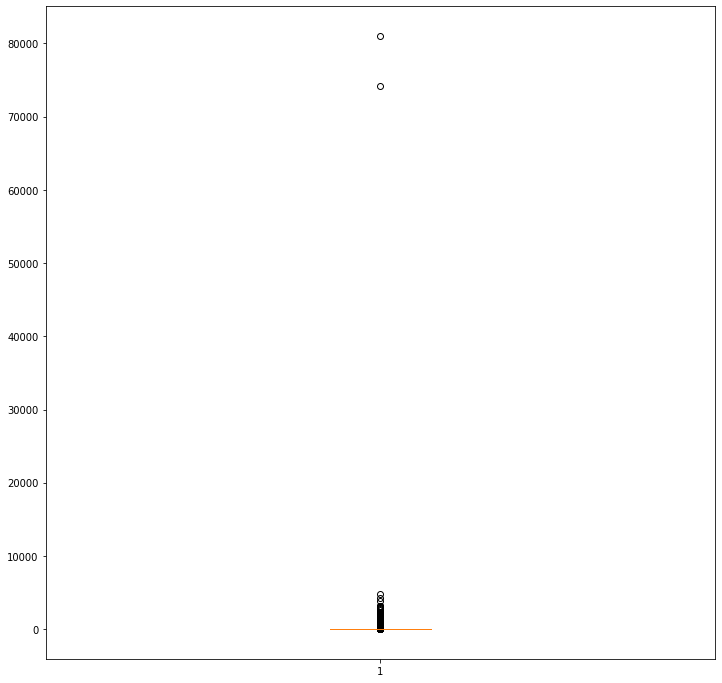

In [18]:
plt.figure(figsize=(12,12))
plt.boxplot(df['Quantity'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1abb52486d8>,
 'caps': [<matplotlib.lines.Line2D at 0x1abb5248dd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1abb5248588>],
 'medians': [<matplotlib.lines.Line2D at 0x1abb8252518>],
 'fliers': [<matplotlib.lines.Line2D at 0x1abb8252898>],
 'means': []}

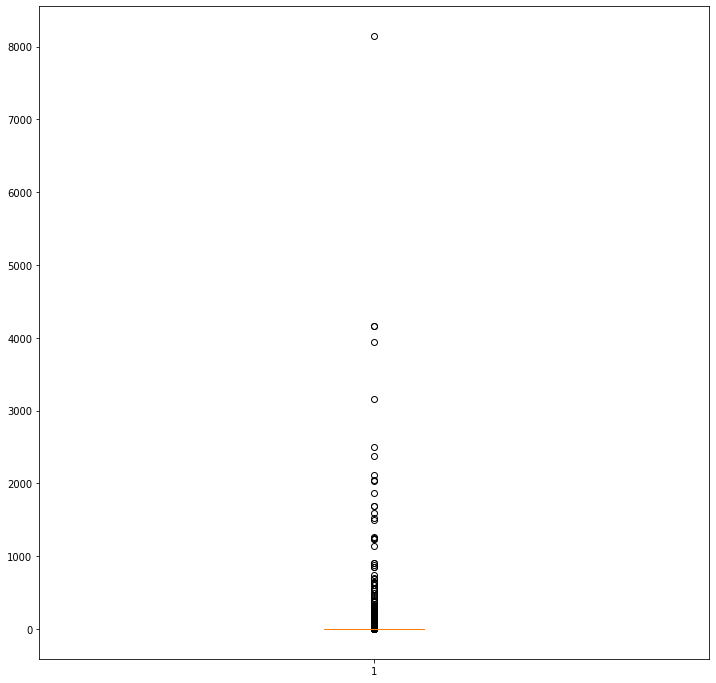

In [19]:
plt.figure(figsize=(12,12))
plt.boxplot(df['UnitPrice'])

### Adding Amount Features

##### Amount columns is added into data frame as monetary value. Quantity and Unit Price are simply multiplied to obtain amount of the products.

In [20]:
df['amount'] = df['Quantity'] * df['UnitPrice'] # 
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,canceled_order,amount
count,392692.0,392692,392692,392692.000000,392692,392692.000000,392692.000000,392692,392692.0,392692.000000
unique,18532.0,3665,3877,NaN,17282,NaN,NaN,37,NaN,NaN
top,576339.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-11-14 15:27:00,NaN,NaN,United Kingdom,NaN,NaN
freq,542.0,2023,2016,NaN,542,NaN,NaN,349203,NaN,NaN
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,13.119702,NaN,3.125914,15287.843865,NaN,0.0,22.631500
std,NaN,NaN,NaN,180.492832,NaN,22.241836,1713.539549,NaN,0.0,311.099224
min,NaN,NaN,NaN,1.000000,NaN,0.001000,12346.000000,NaN,0.0,0.001000
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,13955.000000,NaN,0.0,4.950000


{'whiskers': [<matplotlib.lines.Line2D at 0x1abadcb2748>,
 'caps': [<matplotlib.lines.Line2D at 0x1abadccc518>,
 'boxes': [<matplotlib.lines.Line2D at 0x1abadca9cf8>],
 'medians': [<matplotlib.lines.Line2D at 0x1abadcd2ef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1abadb21550>],
 'means': []}

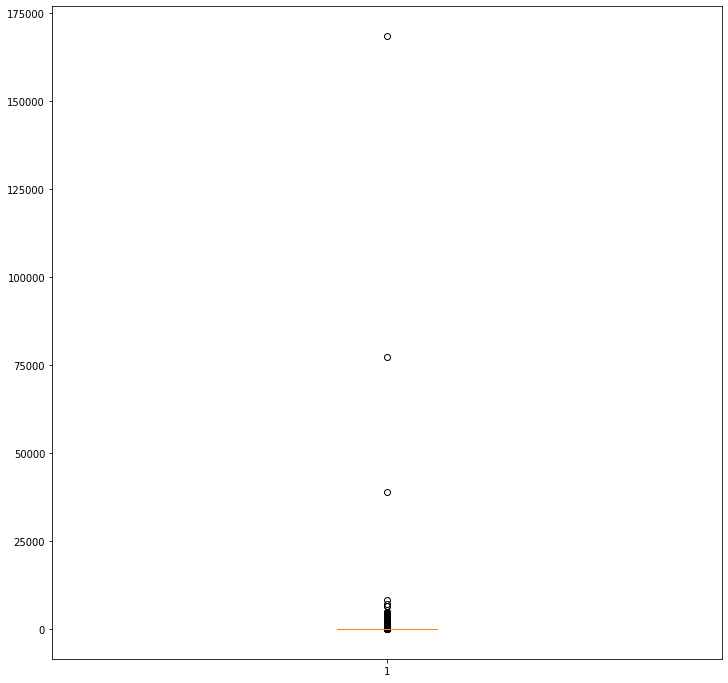

In [21]:
plt.figure(figsize=(12,12))
plt.boxplot(df['amount']) #Using boxplot to spot outliers from amount column in dataset

In [22]:
drop_amount = df['amount']>6000 #Deciding that every value above 6000 would be considered as an outlier
drop_amount.value_counts()

False    392685
True          7
Name: amount, dtype: int64

In [23]:
df = df[~(df['amount']>6000)] #Dropping outliers
df.shape

(392685, 10)

### Building New Data Frame

##### As been told before that RFM (Recence, Frequency, and Monetary) method would be used to measure customers' loyalty in this project, new data frame must be built in order to do that. It only requires Customer ID, Invoice Date, and Amount column from the previous data frame to build new one.

In [24]:
df['CustomerID'].unique().shape

(4337,)

In [25]:
data = { 'Customer ID'  : df['CustomerID'],
         'Invoice Date' : df['InvoiceDate'],
         'Amount'       : df['amount']    
        }

df_new = pd.DataFrame(data)
df_new

,Customer ID,Invoice Date,Amount
0,17850.0,2010-12-01 08:26:00,15.30
1,17850.0,2010-12-01 08:26:00,20.34
2,17850.0,2010-12-01 08:26:00,22.00
3,17850.0,2010-12-01 08:26:00,20.34
4,17850.0,2010-12-01 08:26:00,20.34
5,17850.0,2010-12-01 08:26:00,15.30
6,17850.0,2010-12-01 08:26:00,25.50
7,17850.0,2010-12-01 08:28:00,11.10
8,17850.0,2010-12-01 08:28:00,11.10
9,13047.0,2010-12-01 08:34:00,54.08


### Adding Frequency Features

##### Frequency refers to the number of products that a customer bought

In [26]:
df2 = df_new.groupby(df_new['Customer ID']).count().reset_index() 
df3 = df2.drop(['Amount'],axis=1)                               
df4 = df3.rename(columns={'Invoice Date':'Frequency'})
df4

,Customer ID,Frequency
0,12347.0,182
1,12348.0,31
2,12349.0,73
3,12350.0,17
4,12352.0,85
5,12353.0,4
6,12354.0,58
7,12355.0,13
8,12356.0,59
9,12357.0,131


### Adding Recency Features

##### Recency refers to the last day the customer made transaction

In [27]:
ref_date = df_new['Invoice Date'].max()
ref_date = ref_date+ datetime.timedelta(days=1)
ref_date

Timestamp('2011-12-10 12:50:00')

In [28]:
df_new['days_since_last_purchase'] = ref_date - df_new['Invoice Date']
df_new['days_since_last_purchase_num'] = df_new['days_since_last_purchase'].astype('timedelta64[D]')

df5 = df_new.groupby("Customer ID").min().reset_index()[['Customer ID', 'days_since_last_purchase_num', 'Amount']]
df5.rename(columns={'days_since_last_purchase_num':'Recency'},inplace=True)
df5

,Customer ID,Recency,Amount
0,12347.0,2.0,5.04
1,12348.0,75.0,13.20
2,12349.0,19.0,6.64
3,12350.0,310.0,8.50
4,12352.0,36.0,9.90
5,12353.0,204.0,11.60
6,12354.0,232.0,8.50
7,12355.0,214.0,17.70
8,12356.0,23.0,3.75
9,12357.0,33.0,10.08


### Final Data Frame

In [29]:
df6 = pd.merge(df4, df5)
df6

,Customer ID,Frequency,Recency,Amount
0,12347.0,182,2.0,5.04
1,12348.0,31,75.0,13.20
2,12349.0,73,19.0,6.64
3,12350.0,17,310.0,8.50
4,12352.0,85,36.0,9.90
5,12353.0,4,204.0,11.60
6,12354.0,58,232.0,8.50
7,12355.0,13,214.0,17.70
8,12356.0,59,23.0,3.75
9,12357.0,131,33.0,10.08


In [30]:
df6.describe(include='all')

,Customer ID,Frequency,Recency,Amount
count,4337.000000,4337.000000,4337.000000,4337.000000
mean,15301.089232,90.543002,92.529859,14.079641
std,1721.422291,225.528815,99.968030,100.433631
min,12347.000000,1.000000,1.000000,0.001000
25%,13814.000000,17.000000,18.000000,0.950000
50%,15300.000000,41.000000,51.000000,5.040000
75%,16779.000000,98.000000,142.000000,9.950000
max,18287.000000,7676.000000,374.000000,3861.000000


### Vizualizing Our New Data Frame

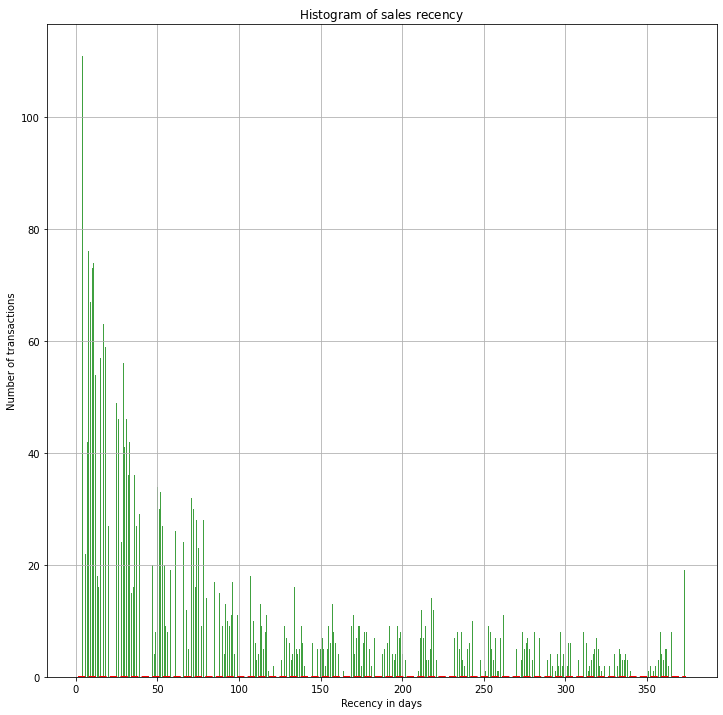

In [31]:
plt.figure(figsize=(12,12))

x = df6['Recency']
mu = np.mean(df6['Recency'])
sigma = math.sqrt(np.var(df6['Recency']))
n, bins, patches = plt.hist(x, 1000, facecolor='green', alpha=0.75) 

# add a 'best fit' line
y = norm.pdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

plt.xlabel('Recency in days')
plt.ylabel('Number of transactions')
plt.title(r'$\mathrm{Histogram\ of\ sales\ recency}\ $')
plt.grid(True)


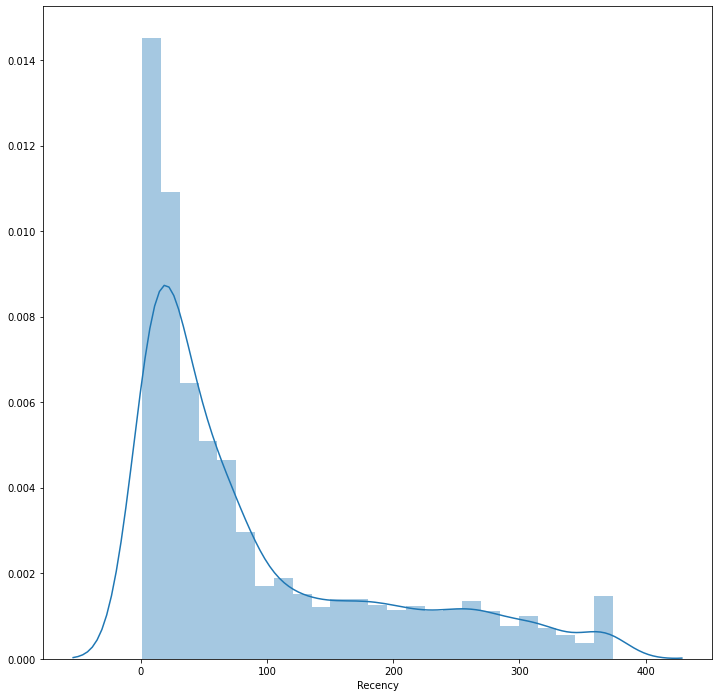

In [32]:
plt.figure(figsize=(12,12))
sns.distplot(df6['Recency'])

## Data Preprocessing


In [33]:
from sklearn import preprocessing

df6['recency_log'] = df6['Recency'].apply(math.log)
df6['frequency_log'] = df6['Frequency'].apply(math.log)
df6['amount_log'] = df6['Amount'].apply(math.log)
feature_vector = ['amount_log', 'recency_log','frequency_log']

X = df6[feature_vector].as_matrix()
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

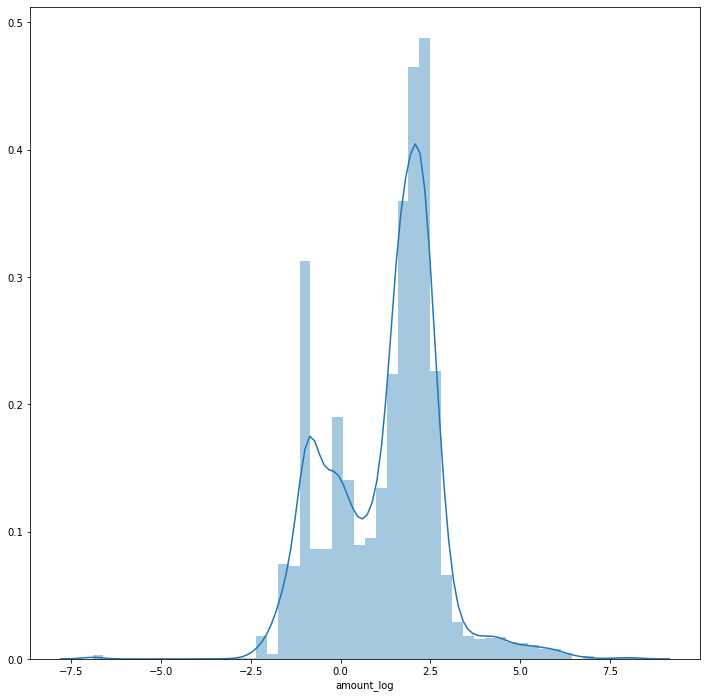

In [34]:
plt.figure(figsize=(12,12))
sns.distplot(df6['amount_log'])

Text(0.5, 0, 'Monetary')

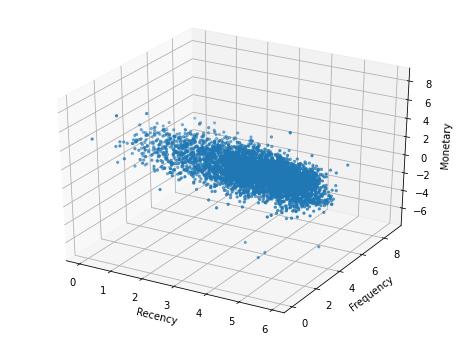

In [35]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax  = fig.add_subplot(111, projection='3d')
xs  = df6.recency_log
ys  = df6.frequency_log
zs  = df6.amount_log

ax.scatter(xs, ys, zs, s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

## Building Model

##### Here, K-means algorithm is built for the final data frame and using silhouette score to determine the most suitable number of cluster for the data. Code from sckit learn is utilized for this part. It can be found [here](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#:~:text=Selecting%20the%20number%20of%20clusters%20with%20silhouette%20analysis%20on%20KMeans%20clustering,-Silhouette%20analysis%20can&text=The%20silhouette%20plot%20displays%20a,of%20%5B%2D1%2C%201%5D)

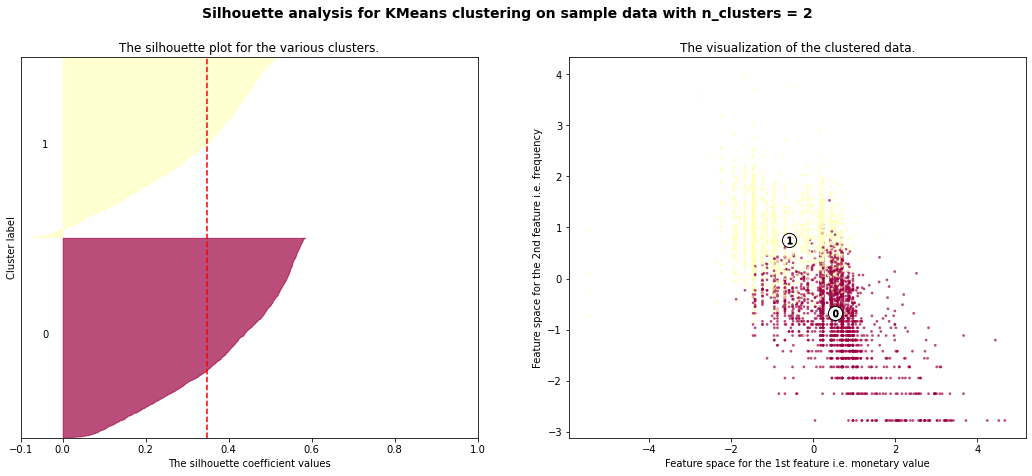

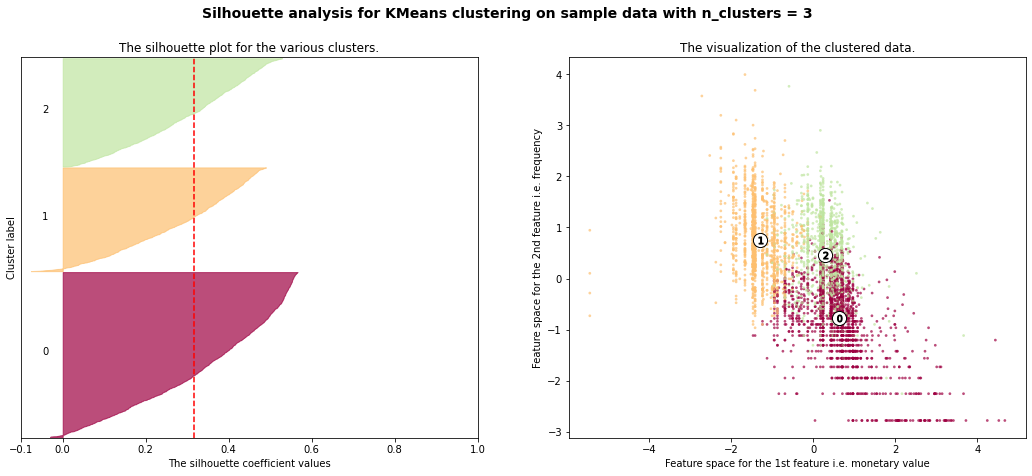

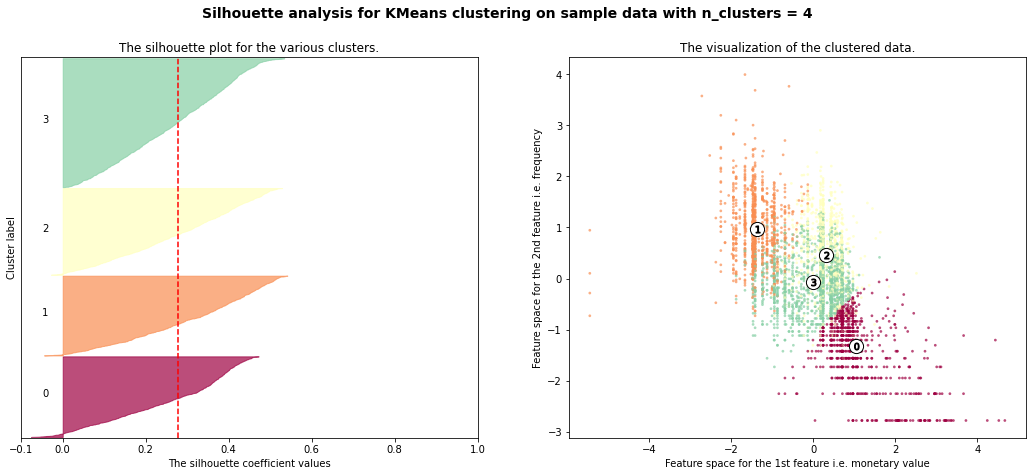

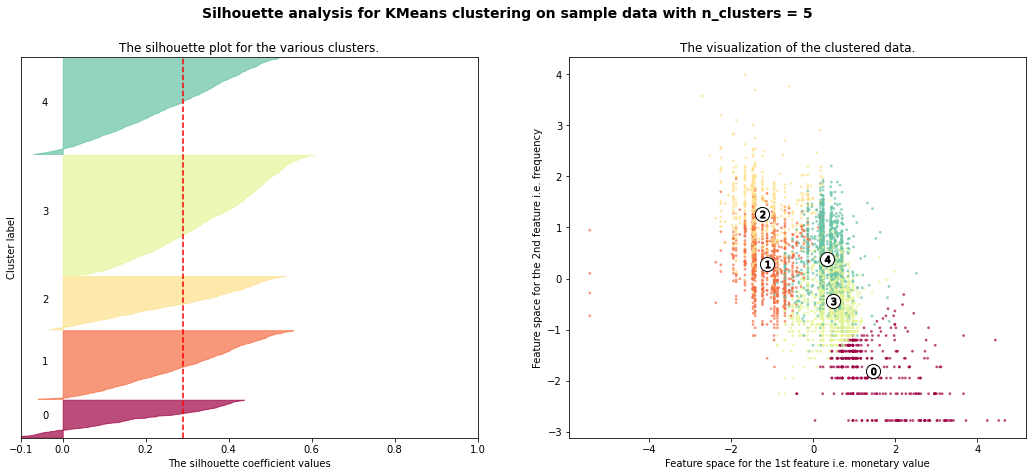

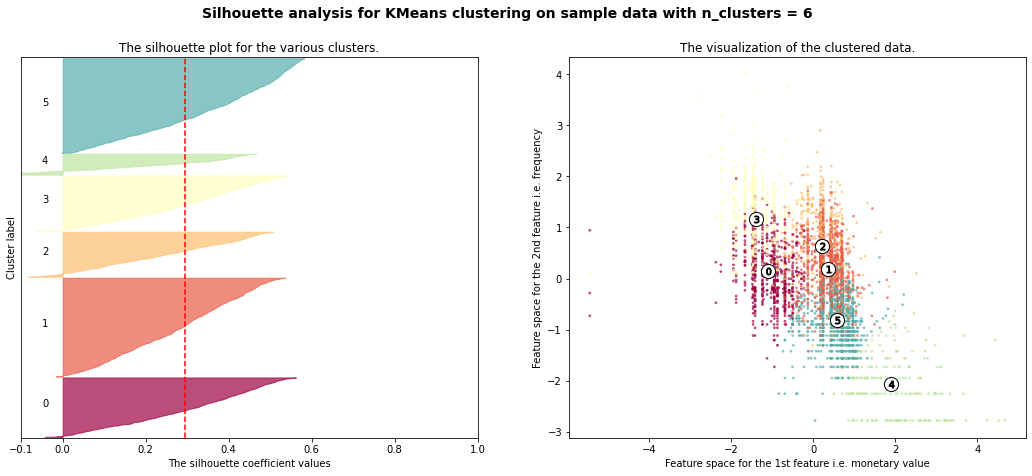

In [36]:

X = X_scaled

cluster_centers = dict()

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    #ax2 = plt.subplot(111, projection='3d')
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    cluster_centers.update({n_clusters :{
                                        'cluster_center':clusterer.cluster_centers_,
                                        'silhouette_score':silhouette_avg,
                                        'labels':cluster_labels}
                           })

    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.get_cmap("Spectral")(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.get_cmap("Spectral")(cluster_labels.astype(float) / n_clusters)
    feature1 = 0
    feature2 = 2
    ax2.scatter(X[:, feature1], X[:, feature2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, feature1], centers[:, feature2], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[feature1], c[feature2], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature i.e. monetary value")
    ax2.set_ylabel("Feature space for the 2nd feature i.e. frequency")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

In [37]:
wcss = [] #Elbow method can be als used to determine the best number of cluster for our data

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
wcss

[13011.000000000002,
 7771.843347603591,
 6186.48305379731,
 5010.0824414994695,
 4239.0769891940645,
 3683.374994990919,
 3261.3805975684827,
 2925.686294929731,
 2681.7206202920224]

Text(0, 0.5, 'WCSS')

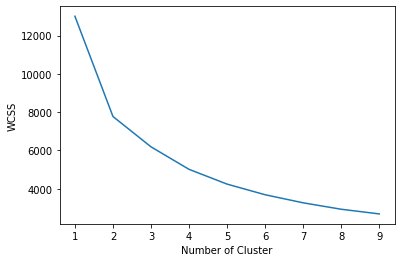

In [38]:
plt.figure()
plt.plot(range(1,10), wcss)
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')

In [39]:
for i in range_n_clusters:
    print("for {} number of clusters".format(i))
    cent_transformed = scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed),columns=feature_vector))
    print("Silhouette score for cluster {} is {}". format(i, cluster_centers[i]['silhouette_score']))
    print()

for 2 number of clusters
   amount_log  recency_log  frequency_log
0    7.803758    99.956143      16.134245
1    1.427091    17.047855     106.210579
Silhouette score for cluster 2 is 0.34716096819296516

for 3 number of clusters
   amount_log  recency_log  frequency_log
0    8.944057   118.930938      14.093275
1    0.505941    30.929696     106.758086
2    5.311127    12.828600      72.218597
Silhouette score for cluster 3 is 0.31686057443249915

for 4 number of clusters
   amount_log  recency_log  frequency_log
0   16.827309   109.613328       6.784090
1    0.442115    18.469855     140.489966
2    5.530386     9.905715      72.074847
3    3.452628   110.873339      35.690878
Silhouette score for cluster 4 is 0.2770645751503889

for 5 number of clusters
   amount_log  recency_log  frequency_log
0   30.726610   100.741415       3.630262
1    0.654396    85.271230      56.528306
2    0.534700     8.003292     206.668966
3    7.119889   119.928355      21.715319
4    5.773680    13.63

## Deciding The Number of Cluster 

##### From the Silhouette score, it can be seen that the number of cluster that has high score is 2 and 3. In parallel, from the elbow method, it can be seen that 2 and 3 are the best fit number of cluster. Thus, 2 and 3 number of clusters are going to be used. But, it is more effective to use 3 number of clusters, 2 clusters more likely classification task.

In [40]:
labels = cluster_centers[2]['labels']   
df6['num_cluster2_labels'] = labels
labels = cluster_centers[3]['labels']
df6['num_cluster3_labels'] = labels

In [41]:
df6

,Customer ID,Frequency,Recency,Amount,recency_log,frequency_log,amount_log,num_cluster2_labels,num_cluster3_labels
0,12347.0,182,2.0,5.04,0.693147,5.204007,1.617406,1,2
1,12348.0,31,75.0,13.20,4.317488,3.433987,2.580217,0,0
2,12349.0,73,19.0,6.64,2.944439,4.290459,1.893112,1,2
3,12350.0,17,310.0,8.50,5.736572,2.833213,2.140066,0,0
4,12352.0,85,36.0,9.90,3.583519,4.442651,2.292535,1,2
5,12353.0,4,204.0,11.60,5.318120,1.386294,2.451005,0,0
6,12354.0,58,232.0,8.50,5.446737,4.060443,2.140066,0,0
7,12355.0,13,214.0,17.70,5.365976,2.564949,2.873565,0,0
8,12356.0,59,23.0,3.75,3.135494,4.077537,1.321756,1,2
9,12357.0,131,33.0,10.08,3.496508,4.875197,2.310553,1,2
